In [2]:
## instalamos requerimientos
!pip install geopandas
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 870.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [rasterio]3/4 [rasterio]


In [3]:
!pip install libpysal mapclassify shapely contextily cartopy termcolor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 2.7 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [libpysal]6/7 [libpysal]fy]


In [29]:
!pip install geopy

In [23]:
import pandas as pd
import numpy as np
import googlemaps
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

In [27]:
##puntos aleatorios, las direcciones que usare no son reales
np.random.seed(42)
cities = ["Baja California",
          "Baja California Sur", 
          "Chiapas",
          "Sonora",
          "Michoacan",
          "Ciudad de Mexico", 
          "Tlaxcala",
          "Nayarit", 
          "Guanajuato",
          "Quintana Roo",
            ]

streets = ["Bahia de los angeles",
            "5 de Mayo",
            "Morelos",
            "Independencia",
            "16 de Septiembre",
            "Revolucion",
            "Niños heroes",
            "Alvaro Obregon",
            "Miguel Aleman",
            "Allende"
           ]
postal_codes = [str(10000 + np.random.randint(0,8999)) for _ in range(100)]

##genera las direcciones aleatorias
addresses = []
for i in range(1,101):
    city = np.random.choice(cities)
    street = np.random.choice(streets)
    postal_code = np.random.choice(postal_codes)
    address = f"{street} {np.random.randint(1,200)}, {postal_code} {city}"
    addresses.append({"Factory": f"Factory {i}", "Address": address}) 

df_addresses = pd.DataFrame(addresses)
print(df_addresses)

        Factory                                         Address
0     Factory 1         Bahia de los angeles 101, 12731 Chiapas
1     Factory 2         Bahia de los angeles 142, 15734 Chiapas
2     Factory 3                Miguel Aleman 15, 10064 Tlaxcala
3     Factory 4                 Allende 179, 15276 Quintana Roo
4     Factory 5         Bahia de los angeles 96, 17555 Tlaxcala
..          ...                                             ...
95   Factory 96         Bahia de los angeles 189, 11267 Chiapas
96   Factory 97              16 de Septiembre 67, 10769 Chiapas
97   Factory 98  Bahia de los angeles 74, 18433 Baja California
98   Factory 99           Morelos 81, 13556 Baja California Sur
99  Factory 100          Alvaro Obregon 154, 16278 Quintana Roo

[100 rows x 2 columns]


In [28]:
data = [
    {"Warehouse": "Warehouse 1", "Address": "Alvaro Obregon 154, 16278 Quintana Roo"},
    {"Warehouse": "Warehouse 2", "Address": "Bahia de los angeles 74, 18433 Baja California"},
    {"Warehouse": "Warehouse 3", "Address": "16 de Septiembre 67, 10769 Chiapas"}
]
df_warehouse = pd.DataFrame(data)

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

#  geocodificador OpenStreetMap 
geolocator = Nominatim(user_agent="my_geocoding_app")

# funcion para obtener coordenadas
def get_coordinates(address):
    try:
        # Delay para respetar límites de uso
        time.sleep(1)
        
        location = geolocator.geocode(address)
        return pd.Series([location.latitude, location.longitude])
    except:
        return pd.Series([None, None])

#  agregamos coordenadas a dataset original
df_addresses[['Latitude', 'Longitude']] = df_addresses['Address'].apply(get_coordinates)

#  CSV
df_addresses.to_csv('factory_coordinates.csv', index=False)

In [35]:
df= pd.read_csv("/Users/morenx/Downloads/tareas/factory_coordinates.csv")
df

,Factory,Address,Latitude,Longitude
0,Factory 1,"Bahia de los angeles 101, 12731 Chiapas",NaN,NaN
1,Factory 2,"Bahia de los angeles 142, 15734 Chiapas",NaN,NaN
2,Factory 3,"Miguel Aleman 15, 10064 Tlaxcala",19.322526,-98.228377
3,Factory 4,"Allende 179, 15276 Quintana Roo",28.350445,-100.863108
4,Factory 5,"Bahia de los angeles 96, 17555 Tlaxcala",NaN,NaN
...,...,...,...,...
95,Factory 96,"Bahia de los angeles 189, 11267 Chiapas",NaN,NaN
96,Factory 97,"16 de Septiembre 67, 10769 Chiapas",16.821493,-93.175184
97,Factory 98,"Bahia de los angeles 74, 18433 Baja California",28.949451,-113.561039
98,Factory 99,"Morelos 81, 13556 Baja California Sur",NaN,NaN


In [ ]:
df_limpio = df.dropna()
df_limpio.to_csv("fabricas.csv", index=False)

In [ ]:
df_limpio.to_csv("fabricas.csv", index=False)

In [43]:
from shapely.geometry import Point, linestring
from geopy.distance import geodesic
import contextily as ctx
import os
from pathlib import Path
import zipfile

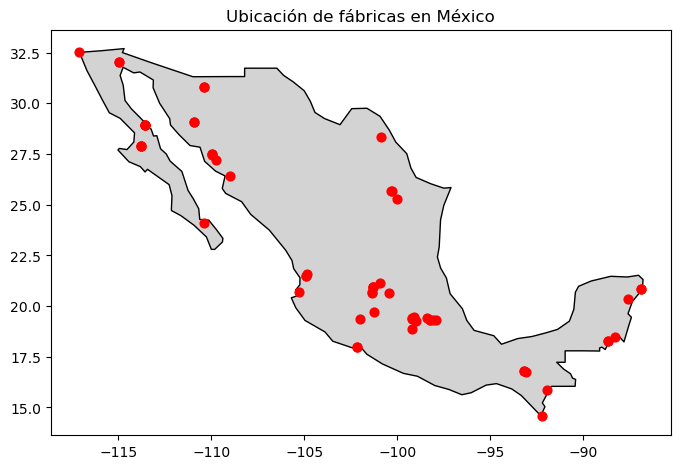

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Leer tu CSV
df = pd.read_csv("/Users/morenx/Downloads/tareas/fabricas.csv")
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]),
    crs="EPSG:4326"
)

# Leer GeoJSON de Natural Earth directamente desde el sitio oficial
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)
mexico = world[world["ADMIN"] == "Mexico"]

# Graficar
fig, ax = plt.subplots(figsize=(8, 10))
mexico.plot(ax=ax, color="lightgray", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=40)
plt.title("Ubicación de fábricas en México")
plt.show()

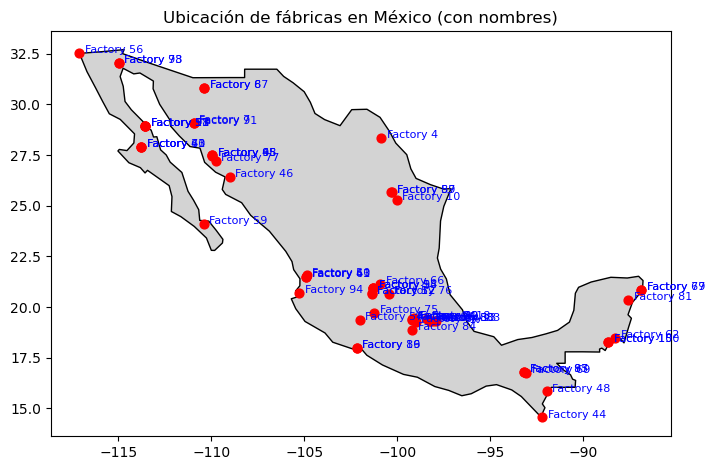

In [2]:
fig, ax = plt.subplots(figsize=(8, 10))
mexico.plot(ax=ax, color="lightgray", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=40)

# Mostrar etiquetas con el nombre de la fábrica
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["Factory"]):
    ax.text(x + 0.3, y, label, fontsize=8, color="blue")

plt.title("Ubicación de fábricas en México (con nombres)")
plt.show()

In [3]:
# Convertir a proyección métrica (UTM zona 14N aprox. para México)
gdf_m = gdf.to_crs(epsg=32614)

# Calcular distancias entre todas las fábricas
distancias = gdf_m.geometry.apply(lambda g: gdf_m.distance(g))
print(distancias.head())

# Distancia promedio entre todas
print("Distancia promedio (km):", distancias.mean().mean() / 1000)

             0             1             2             3             4   \
0  0.000000e+00  1.034890e+06  1.772927e+06  1.691610e+06  3.687623e+05   
1  1.034890e+06  0.000000e+00  9.670694e+05  9.956429e+05  8.194091e+05   
2  1.772927e+06  9.670694e+05  0.000000e+00  2.036642e+05  1.428700e+06   
3  1.691610e+06  9.956429e+05  2.036642e+05  0.000000e+00  1.334129e+06   
4  3.687623e+05  8.194091e+05  1.428700e+06  1.334129e+06  0.000000e+00   

             5             6             7             8             9   ...  \
0  6.848472e+05  1.899433e+06  3.620164e+05  1.310385e+04  3.687623e+05  ...   
1  3.502784e+05  1.253975e+06  8.529868e+05  1.037712e+06  8.194091e+05  ...   
2  1.194136e+06  3.776421e+05  1.449826e+06  1.781159e+06  1.428700e+06  ...   
3  1.168422e+06  2.590787e+05  1.351602e+06  1.700891e+06  1.334129e+06  ...   
4  4.951191e+05  1.534726e+06  3.428358e+04  3.798818e+05  0.000000e+00  ...   

             51            52            53            54           

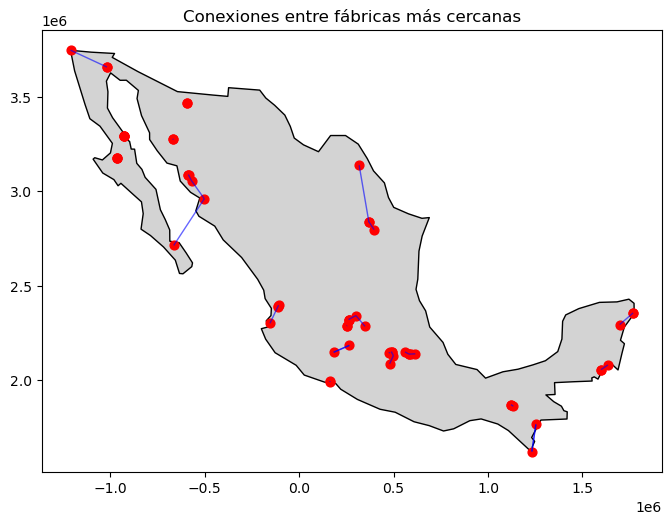

In [8]:
from shapely.ops import nearest_points

# Convertir a proyección métrica para calcular distancias (en metros)
gdf_m = gdf.to_crs(epsg=32614)

# Encontrar la fábrica más cercana a cada una
lineas = []
for i, row in gdf_m.iterrows():
    otras = gdf_m.drop(i)
    nearest_geom = otras.distance(row.geometry).idxmin()
    nearest_point = otras.loc[nearest_geom].geometry
    lineas.append(LineString([row.geometry, nearest_point]))

line_gdf = gpd.GeoDataFrame(geometry=lineas, crs=gdf_m.crs)

# Graficar
fig, ax = plt.subplots(figsize=(8, 10))
mexico.to_crs(epsg=32614).plot(ax=ax, color="lightgray", edgecolor="black")
line_gdf.plot(ax=ax, color="blue", linewidth=1, alpha=0.6)
gdf_m.plot(ax=ax, color="red", markersize=40)
plt.title("Conexiones entre fábricas más cercanas")
plt.show()

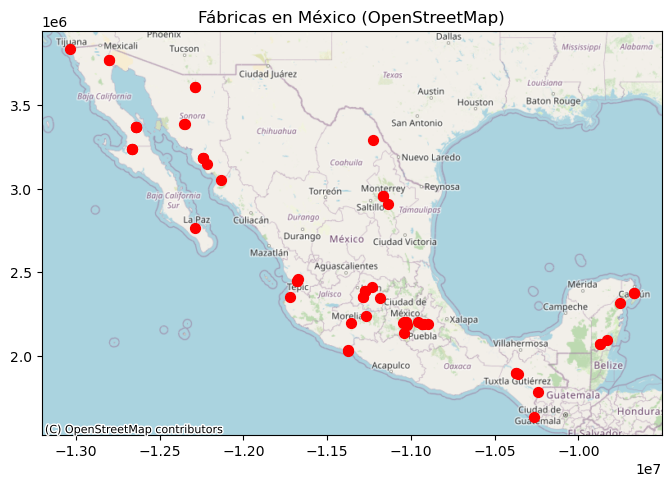

In [14]:
import contextily as ctx

gdf_web = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(8, 10))
gdf_web.plot(ax=ax, color="red", markersize=50)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Fábricas en México (OpenStreetMap)")
plt.show()

BUFFERING
crea un polígono de área de influencia alrededor de una geometría existente (un punto, una línea o un polígono).

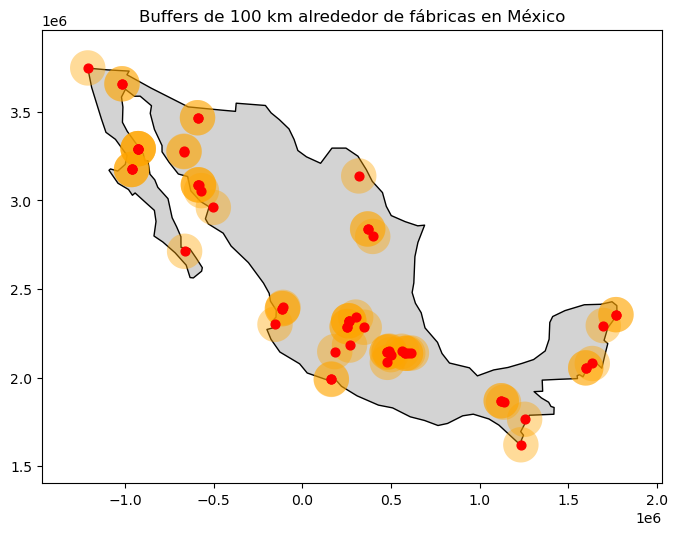

In [15]:
# Convertir a coordenadas UTM (m)
gdf_m = gdf.to_crs(epsg=32614)
mexico_m = mexico.to_crs(epsg=32614)

# Crear buffer de 100 km (100,000 metros)
buffers = gdf_m.copy()
buffers["geometry"] = buffers.buffer(100_000)

# Graficar
fig, ax = plt.subplots(figsize=(8, 10))
mexico_m.plot(ax=ax, color="lightgray", edgecolor="black")
buffers.plot(ax=ax, color="orange", alpha=0.4, edgecolor="none")
gdf_m.plot(ax=ax, color="red", markersize=40)
plt.title("Buffers de 100 km alrededor de fábricas en México")
plt.show()

CLIPPING
extraer una parte de un conjunto de datos geográficos utilizando los límites de otra geometría.

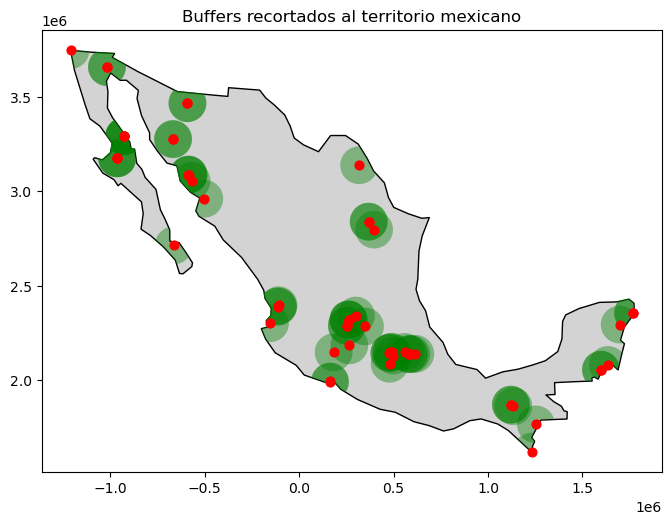

In [16]:
# Recortar los buffers al contorno de México
buffers_recortados = gpd.clip(buffers, mexico_m)

# Graficar buffers recortados
fig, ax = plt.subplots(figsize=(8, 10))
mexico_m.plot(ax=ax, color="lightgray", edgecolor="black")
buffers_recortados.plot(ax=ax, color="green", alpha=0.4, edgecolor="none")
gdf_m.plot(ax=ax, color="red", markersize=40)
plt.title("Buffers recortados al territorio mexicano")
plt.show()

Union de buffers?

/var/folders/lt/n0_y0qx173v13mss419tfhlm0000gn/T/ipykernel_69533/459584853.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  zona_total = buffers_recortados.unary_union


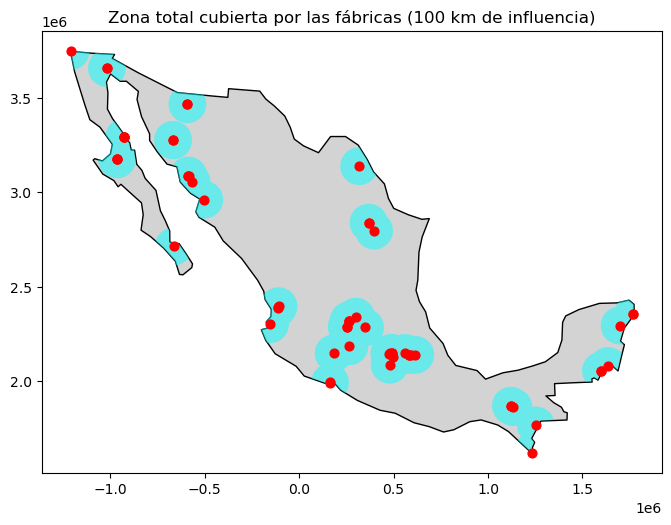

In [17]:
# Unir todos los buffers en una sola forma
zona_total = buffers_recortados.unary_union

# Convertir a GeoDataFrame
zona_total_gdf = gpd.GeoDataFrame(geometry=[zona_total], crs=mexico_m.crs)

# Graficar
fig, ax = plt.subplots(figsize=(8, 10))
mexico_m.plot(ax=ax, color="lightgray", edgecolor="black")
zona_total_gdf.plot(ax=ax, color="cyan", alpha=0.5)
gdf_m.plot(ax=ax, color="red", markersize=40)
plt.title("Zona total cubierta por las fábricas (100 km de influencia)")
plt.show()

clipping avanzado?

In [20]:
estados = gpd.read_file("/Users/morenx/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp").to_crs(epsg=32614)
intersect = gpd.overlay(buffers_recortados, estados, how="intersection")

# Contar cuántas fábricas o buffers cubren cada estado
conteo = intersect.groupby("NOM_ENT").size().reset_index(name="num_fabricas_cubren")
print(conteo)

GEOSException: IllegalArgumentException: CGAlgorithmsDD::orientationIndex encountered NaN/Inf numbers